In [1]:
#This project aims to develop a precise classification algorithm that determines the survival outcome of Titanic passengers.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
train = pd.read_csv(r'C:\Users\camwa\OneDrive\Datasets\titanic.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: >

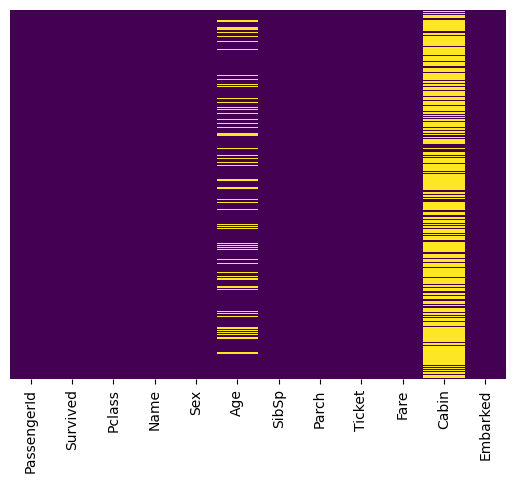

In [7]:
#Looking to see where there is missing data
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [8]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

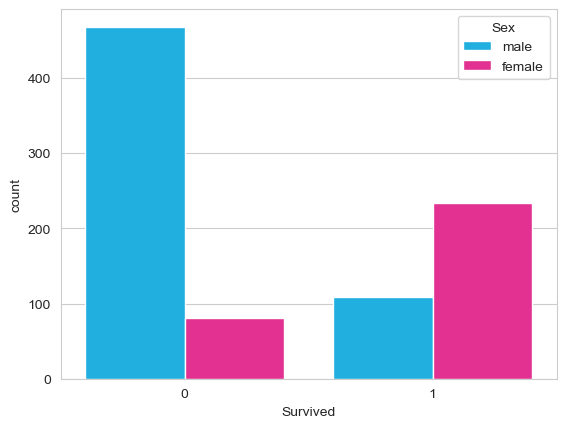

In [9]:
#Creating a plot that displays the count of occurrences for those who survived based on their sex
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = ['#00BFFF', '#FF1493'])

<Axes: xlabel='Survived', ylabel='count'>

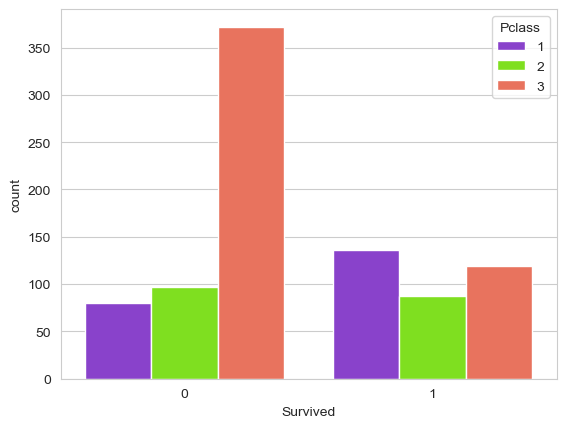

In [10]:
#Creating a plot to display the count of occurrences for those who survived based on their passenger class
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = ['#8A2BE2', '#7FFF00', '#FF6347'])

C:\Users\camwa\AppData\Local\Temp\ipykernel_21088\3649210804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde = False, bins = 30, color='#7FFF00')


<Axes: xlabel='Age'>

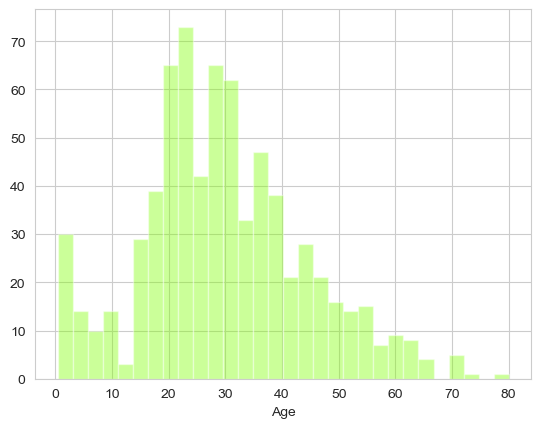

In [11]:

sns.distplot(train['Age'].dropna(), kde = False, bins = 30, color='#7FFF00')

<Axes: xlabel='SibSp', ylabel='count'>

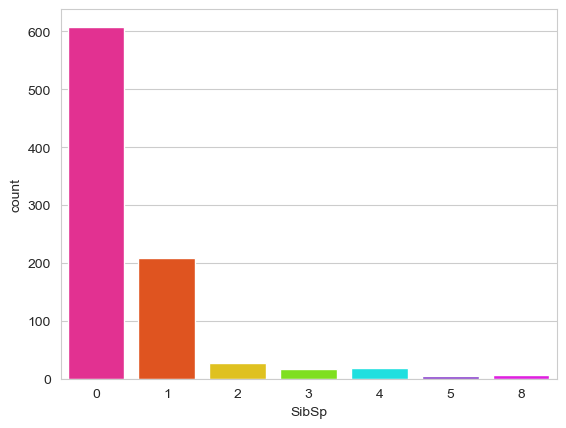

In [12]:
sns.countplot(x = "SibSp", data = train, palette = ["#FF1493", "#FF4500", "#FFD700", "#7FFF00", "#00FFFF", "#8A2BE2", "#FF00FF"])

<Axes: >

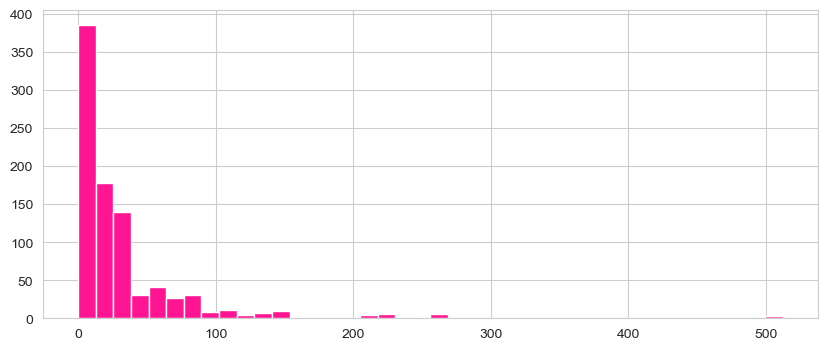

In [13]:
#Here I am creating a histogram to show the showing the distribution of ticket fares. It seems most of the passengers were paying a lower fair, signifing that most passengers were part of lower passenger classes. 
train['Fare'].hist(bins = 40, color = '#FF1493', figsize = (10,4) )

<Axes: xlabel='Pclass', ylabel='Age'>

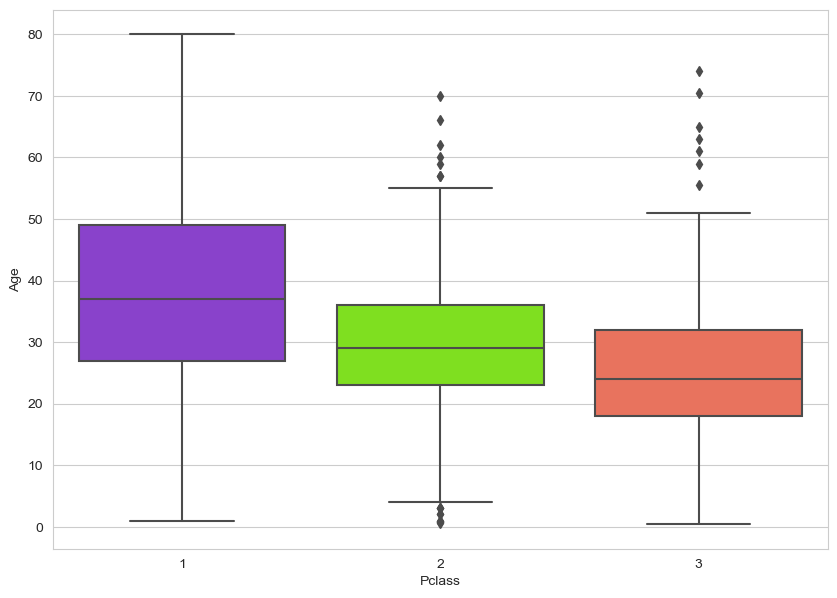

In [14]:
#To address the missing age data, I will compute the average age within each Pclass category and then impute these numbers in the missing age values for those in each respective category.
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass", y = "Age", data = train, palette = ['#8A2BE2', '#7FFF00', '#FF6347'] )

In [15]:
#I have to create an imputation function that applies the average age of each Pclass to passengers within those specific classes who lack an age value.
def impute_age(cols):
    Age = cols[0]      #These lines assign the first and second elements of the cols variable to Age and Pclass variables.       
    Pclass = cols[1]
    
    if pd.isnull(Age):      #This conditional statement checks if the 'Age' value is missing.
        if Pclass == 1:     #If the passenger class is 1, it returns the age value 37.
            return 37
        elif Pclass == 2:   #If the passenger class is 2, it returns the age value 29.
            return 29
        else:
            return 24       #If the passenger class is 3, it returns the age value 24.
    else: 
        return Age          # If the age value is not missing it simply returns the original age value. 

In [16]:
#I am applying the impute_age function to the data. 
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

<Axes: >

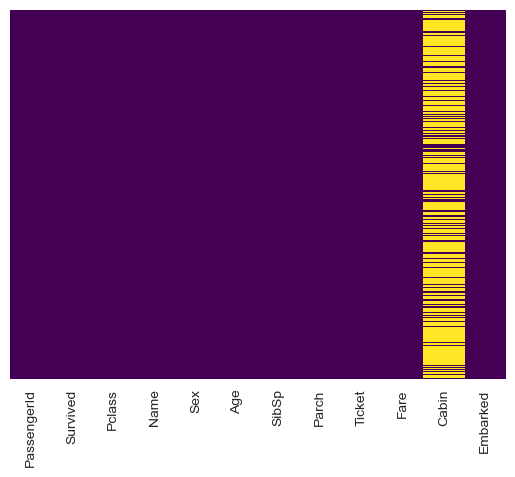

In [17]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [18]:
#There is too much missing data for the Cabin column so I am going to drop that column. 
train.drop('Cabin', axis = 1, inplace = True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
train.dropna(inplace = True)

In [21]:
#Now I'm going to prepare the dummy variables to ensure that my machine learning algorithm can process the categorical data.
sex = pd.get_dummies(train['Sex'], drop_first= True)
embark = pd.get_dummies(train['Embarked'], drop_first= True)
pclass = pd.get_dummies(train['Pclass'], drop_first= True)

In [22]:
#Adding the new columns to the dataframe
train = pd.concat([train, sex, embark, pclass], axis = 1)

In [23]:
#Dropping columns I am not going to use
train.drop(['PassengerId','Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis = 1, inplace = True)

In [24]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [25]:
#Splitting the data into training and testing data
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
#The next step is to train and predict by creating a model
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()

In [30]:
X_train.columns = X_train.columns.astype(str)

In [31]:
#Fit the model
logmodel = LogisticRegression(max_iter=1000) #I got a message stating that indicates that the algorithm reached the maximum number of iterations allowed without fully converging. 
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
#Using a trained logistic regression model to make predictions
X_test.columns = X_test.columns.astype(str)
predictions = logmodel.predict(X_test)

In [33]:
#Now I am going to look at a report of various classification metrics comparing the true target values against the predicted values.
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [35]:
print(f"Interpretation:\nPrecision: 82% were correctly predicted as Not Survived and 85% were correctly predicted as Survived.\nRecall: 92% of all actual instances of Not Survived were correctly identified as Not Survived and 68% of all actual instances of Survived were correctly identified as Survived.\nAccuracy: 83% of the total number of instances were predicted correctly. The model performs relatively well in predicting Not Survived instances with high precision and recall. However, for Survived instances, the precision is slightly higher than the recall, indicating that while the model identifies Survived instances reasonably well, there might be some missed predictions. There might be room for improvement, especially in correctly identifying Survived instances.")






Interpretation:
Precision: 82% were correctly predicted as Not Survived and 85% were correctly predicted as Survived.
Recall: 92% of all actual instances of Not Survived were correctly identified as Not Survived and 68% of all actual instances of Survived were correctly identified as Survived.
Accuracy: 83% of the total number of instances were predicted correctly. The model performs relatively well in predicting Not Survived instances with high precision and recall. However, for Survived instances, the precision is slightly higher than the recall, indicating that while the model identifies Survived instances reasonably well, there might be some missed predictions. There might be room for improvement, especially in correctly identifying Survived instances.


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 33  71]]


In [38]:
print("The model correctly predicting 150 instances of the first class ('Not Survived') and 71 instances of the second class ('Survived'). However,  13 instances of the first class were inaccurately predicted as the second class (False Positives), and 33 instances of the second class were falsely identified as the first class (False Negatives). Precision, estimated at around 84.52%, indicates the model's ability to identify actual 'Survived' instances among predicted positives, while a recall of 68.27% reveals a lower degree of the model's capability to capture all actual 'Survived' instances. The higher count of False Negatives than False Positives suggests a potential bias towards predicting the first class ('Not Survived') more accurately than the second class ('Survived').")

The model correctly predicting 150 instances of the first class ('Not Survived') and 71 instances of the second class ('Survived'). However,  13 instances of the first class were inaccurately predicted as the second class (False Positives), and 33 instances of the second class were falsely identified as the first class (False Negatives). Precision, estimated at around 84.52%, indicates the model's ability to identify actual 'Survived' instances among predicted positives, while a recall of 68.27% reveals a lower degree of the model's capability to capture all actual 'Survived' instances. The higher count of False Negatives than False Positives suggests a potential bias towards predicting the first class ('Not Survived') more accurately than the second class ('Survived').
